In [14]:
#Logistic Regression
import pandas as pd

In [15]:
df = pd.read_csv("HTRU_2.csv",header=None)

In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
log_cla = LogisticRegression(random_state = 0)
log_cla.fit(X_train, y_train)
log_pred = log_cla.predict(X_test)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, log_pred)
print(cm)
accuracy_score(y_test, log_pred)

[[4071   29]
 [  55  320]]


0.9812290502793296

In [21]:
temp_list = [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
acc_lst = []
tpr_lst = []
thresh_lst = []
for thresh in temp_list:
    pred_prob = log_cla.predict_proba(X_test)
    pred_prob = (pred_prob[:,1]>=thresh).astype('int')
    cm = confusion_matrix(y_test, pred_prob)
    acc_lst.append(accuracy_score(y_test, pred_prob))
    tpr_lst.append(cm[1][1]/(cm[1][1]+cm[0][1]))
    thresh_lst.append(thresh)

In [22]:
log_reg = pd.DataFrame(
    {
        'Threshold':thresh_lst,
        'Accuracy':acc_lst,
        'Sensitivity':tpr_lst
    })

In [23]:
log_reg['Diff'] = log_reg['Accuracy'] - log_reg['Sensitivity']

In [24]:
import matplotlib.pyplot as plt

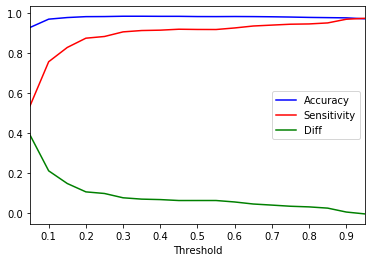

In [25]:
ax = plt.gca()
log_reg.plot(kind='line',x='Threshold',y='Accuracy',color='blue',ax=ax)
log_reg.plot(kind='line',x='Threshold',y='Sensitivity',color='red',ax=ax)
log_reg.plot(kind='line',x='Threshold',y='Diff',color='green',ax=ax)
plt.show()

In [26]:
log_reg.to_csv('logistic_regression.csv',index=False)